In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv('data_for_lr.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data= data.dropna()
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [5]:
train_input= np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

test_input= np.array(data.x[500:700]).reshape(199,1)
test_output= np.array(data.y[500:700]).reshape(199,1)

In [12]:
class LinearRegression:
    def __init__(self):
        self.parameters= {}
        
    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        prediction = np.multiply(m, train_input) + c
        return prediction
    
    def cost_function(self, prediction, train_output):
        cost = np.mean((train_output - prediction) ** 2)
        return cost
    
    def backward_propagation(self, train_input, train_output, prediction):
        derivatives = {}
        df = (train_output - prediction) * -1
        dm = np.mean(np.multiply(train_input, df))
        dc = np.mean(df)
        derivatives['dm']=dm
        derivatives['dc']=dc
        return derivatives
    
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']
    
    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0,1) * -1
        self.parameters['c'] = np.random.uniform(0,1) * -1
        
        self.loss=[]
        
        for i in range(iters):
            
            prediction = self.forward_propagation(train_input)
            
            cost = self.cost_function(prediction, train_output)
            
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(i+1, cost))
            
            derivatives= self.backward_propagation(train_input, train_output, prediction)
            
            self.update_parameters(derivatives, learning_rate)
            
        return self.parameters, self.loss

In [13]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 7032.1480275036865
Iteration = 2, Loss = 3194.7670563857337
Iteration = 3, Loss = 1453.7430592849212
Iteration = 4, Loss = 663.8385433070724
Iteration = 5, Loss = 305.45798941385283
Iteration = 6, Loss = 142.86033509215764
Iteration = 7, Loss = 69.08959916327493
Iteration = 8, Loss = 35.6197344975701
Iteration = 9, Loss = 20.43441976287834
Iteration = 10, Loss = 13.544825584611448
Iteration = 11, Loss = 10.419009011479705
Iteration = 12, Loss = 9.000822506716172
Iteration = 13, Loss = 8.357389655415899
Iteration = 14, Loss = 8.065463394844192
Iteration = 15, Loss = 7.933016063832398
Iteration = 16, Loss = 7.872924499810559
Iteration = 17, Loss = 7.845660827419479
Iteration = 18, Loss = 7.8332912058259865
Iteration = 19, Loss = 7.827679031579808
Iteration = 20, Loss = 7.825132718683116


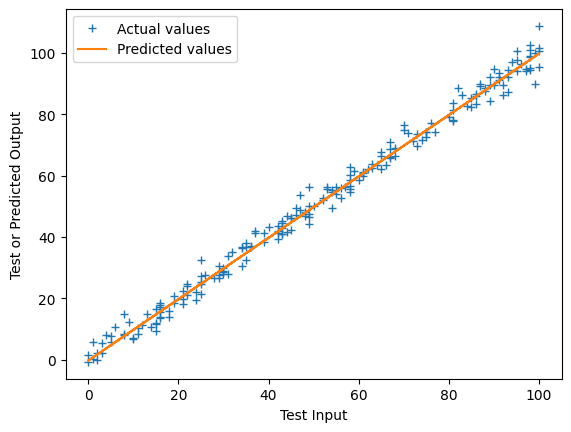

In [19]:
y_pred = test_input * parameters['m'] + parameters['c']

plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label= 'Predicted values')
plt.xlabel('Test Input')
plt.ylabel('Test or Predicted Output')
plt.legend()
plt.show()